In [3]:
import cv2
import numpy as np

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import image_dataset_from_directory

2024-06-23 20:44:20.333087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nisal/anaconda3/envs/trainme/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2024-06-23 20:44:20.333126: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Dataset shape: (35887, 3)
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
Missing values:
emotion    0
pixels     0
Usage      0
dtype: int64


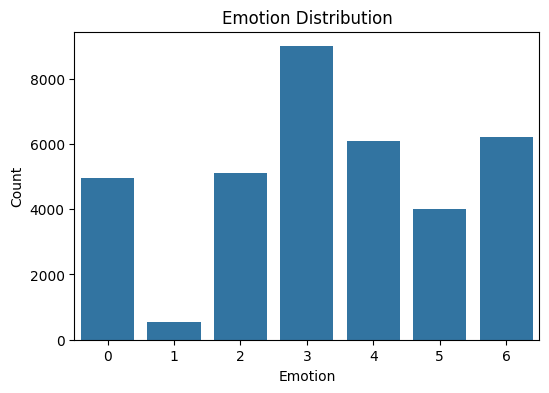

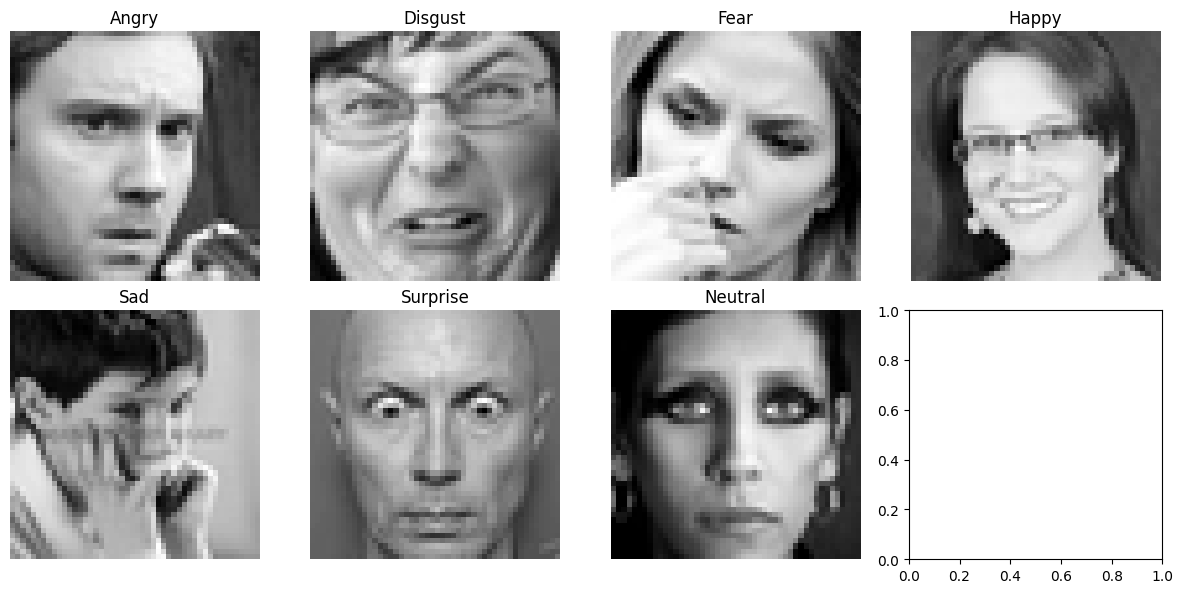

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the FER dataset 
data = pd.read_csv('fer/fer2013.csv')

# Check the shape of the dataset
print("Dataset shape:", data.shape)

# Check the first few rows
print(data.head())

# Get summary statistics
print(data.describe())

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Plot the distribution of emotions
plt.figure(figsize=(6,4))
sns.countplot(data, x='emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

# Plot sample images for each emotion
emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()

for i in range(7):  
    img = data[data['emotion']==i].pixels.iloc[0]
    img = np.array(img.split())
    img = img.reshape(48, 48)
    axs[i].imshow(img.astype(np.uint8), cmap='gray')
    axs[i].set_title(emotions[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
val_ds = image_dataset_from_directory(
  'fer/images/validation',
  validation_split=0.2,  
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(48, 48),
  batch_size=8)

emotions = {
            0: "Angry",
            1: "Disgust",
            2: "Fear",
            3: "Happy",
            4: "Sad",
            5: "Surprise",
            6: "Neutral",
        }

Found 7066 files belonging to 7 classes.
Using 1413 files for validation.


2024-06-23 20:44:29.047192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-06-23 20:44:29.048609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nisal/anaconda3/envs/trainme/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/foxy/opt/yaml_cpp_vendor/lib:/opt/ros/foxy/opt/rviz_ogre_vendor/lib:/opt/ros/foxy/lib/x86_64-linux-gnu:/opt/ros/foxy/lib
2024-06-23 20:44:29.048986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nisal/anaconda3/envs/trainme/lib/python3.8/site-packages/cv2/../../lib64:

In [6]:
def preprocess_input(x, v2=False):
    x = x.astype("float32")
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

emotion_model = "users/models/model.h5"
model = load_model(emotion_model, compile=compile)
model.make_predict_function()

In [7]:
predictions = []
labels = []
for image, label in val_ds:
    # print(image.shape)
    emotion_prediction = np.argmax(model.predict(image), axis=1).tolist()
    # print(np.argmax(emotion_prediction, axis=1))

    labels.extend(label.numpy().tolist())

    for emotion in emotion_prediction:
        predictions.append(emotion)

print(predictions)
print(labels)

[6, 0, 6, 0, 6, 0, 6, 0, 4, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 6, 0, 6, 6, 6, 0, 0, 6, 6, 0, 0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 6, 2, 0, 6, 6, 0, 6, 6, 0, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 0, 6, 0, 0, 6, 0, 6, 0, 0, 6, 6, 6, 6, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 6, 6, 6, 0, 6, 6, 6, 0, 6, 0, 0, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 0, 6, 0, 6, 6, 0, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 0, 6, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 0, 6, 6, 6, 6, 0, 0, 6, 0, 6, 6, 0, 6, 6, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 2, 6, 0, 6, 6, 0, 6, 0, 0, 6, 6, 6, 6, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 0, 6, 6, 0, 0, 6, 6, 0, 6, 0, 0, 0, 2, 6, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 6, 0, 6, 

/home/nisal/anaconda3/envs/trainme/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





Precision: 0.419793877662894
Recal: 0.17338995046001415
F1-Score: 0.07702711339677634


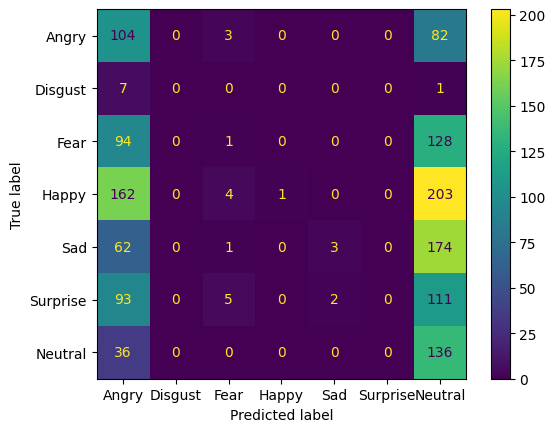

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

metrices = precision_recall_fscore_support(labels, predictions, average="weighted")

print("\n\n")
print(f"Precision: {metrices[0]}")
print(f"Recal: {metrices[1]}")
print(f"F1-Score: {metrices[2]}")

cm = confusion_matrix([emotions[label] for label in labels], [emotions[pred] for pred in predictions], labels=list(emotions.values()))
ConfusionMatrixDisplay(cm, display_labels=list(emotions.values())).plot()
plt.show()

In [9]:
val_ds = image_dataset_from_directory(
  'fer/images/validation',
  validation_split=0.2,  
  subset="validation",
  seed=123,
  image_size=(48, 48),
  batch_size=8)

Found 7066 files belonging to 7 classes.
Using 1413 files for validation.


In [10]:
import os

from glob import glob
from fer import FER

detector = FER()

predictions = []
labels = []

emotions = os.listdir('fer/images/validation')

for emotion in emotions:
    img_list = list(glob(os.path.join('fer/images/validation', emotion, "*.jpg")))

    for img_path in img_list:
        img = cv2.imread(img_path)
        em = detector.detect_emotions(img)
        if len(em):
            ems = em[0]["emotions"]
            print(ems)

            predictions.append(list(ems)[list(ems.values()).index(max(list(ems.values())))])
            labels.append(emotion)

print(predictions)
print(labels)

[]
[]


In [13]:
from pptx import Presentation

prs = Presentation("media/ppt/20240523_Gallara Acharige_Nisal Chinthana Perera_92124836_DLMDSDL01.pptx")

# text_runs will be populated with a list of strings,
# one for each text run in presentation
slide_dict = {}
for idx, slide in enumerate(prs.slides, start=1):
    slide_content = {
        "title": "",
        "body": ""
    }

    # Extract title
    if slide.shapes.title:
        slide_content["title"] = slide.shapes.title.text

    # Extract body text
    body_texts = []
    for shape in slide.shapes:
        if shape.has_text_frame and shape != slide.shapes.title:
            for paragraph in shape.text_frame.paragraphs:
                body_texts.append(paragraph.text)
    
    slide_content["body"] = '\n'.join(body_texts)
    slide_dict[idx] = slide_content

slide_dict

{1: {'title': 'Exploring Semi-Supervised Learning: Principles, Evaluation, and Applications',
  'body': ' A Deep Dive into Enhancing Machine Learning with Unlabeled Data'},
 2: {'title': 'Introduction to Semi-Supervised Learning',
  'body': 'machine learning approach that combines a small amount of labeled data with a large amount of unlabeled data during training.\nThis method leverages the information contained in both data types to improve model accuracy, especially in scenarios where labeled data is scarce or expensive to obtain.'},
 3: {'title': 'Importance of SSL in leveraging both labeled and unlabeled data',
  'body': ''}}